In [1]:
#importando bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#visão geral do nosso dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Aqui podemos considerar algumas informações importantes, como o Desvio Padrão e também a Média de algumas colunas.
- A média da quantidade de dinheiro em cada conta é aproximadamente $1600;
- A variação do limite do cartão de nosso dataset é bem alta.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.shape

(8950, 18)

In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#optando por remover os ND's de nosso dataset pela média de cada coluna
new_df = df.replace([np.inf, -np.inf], np.nan).fillna(df.mean())
new_df.isnull().sum()

C:\Users\guilh\AppData\Local\Temp\ipykernel_7196\338796340.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df = df.replace([np.inf, -np.inf], np.nan).fillna(df.mean())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
new_df = new_df.drop(['CUST_ID'], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

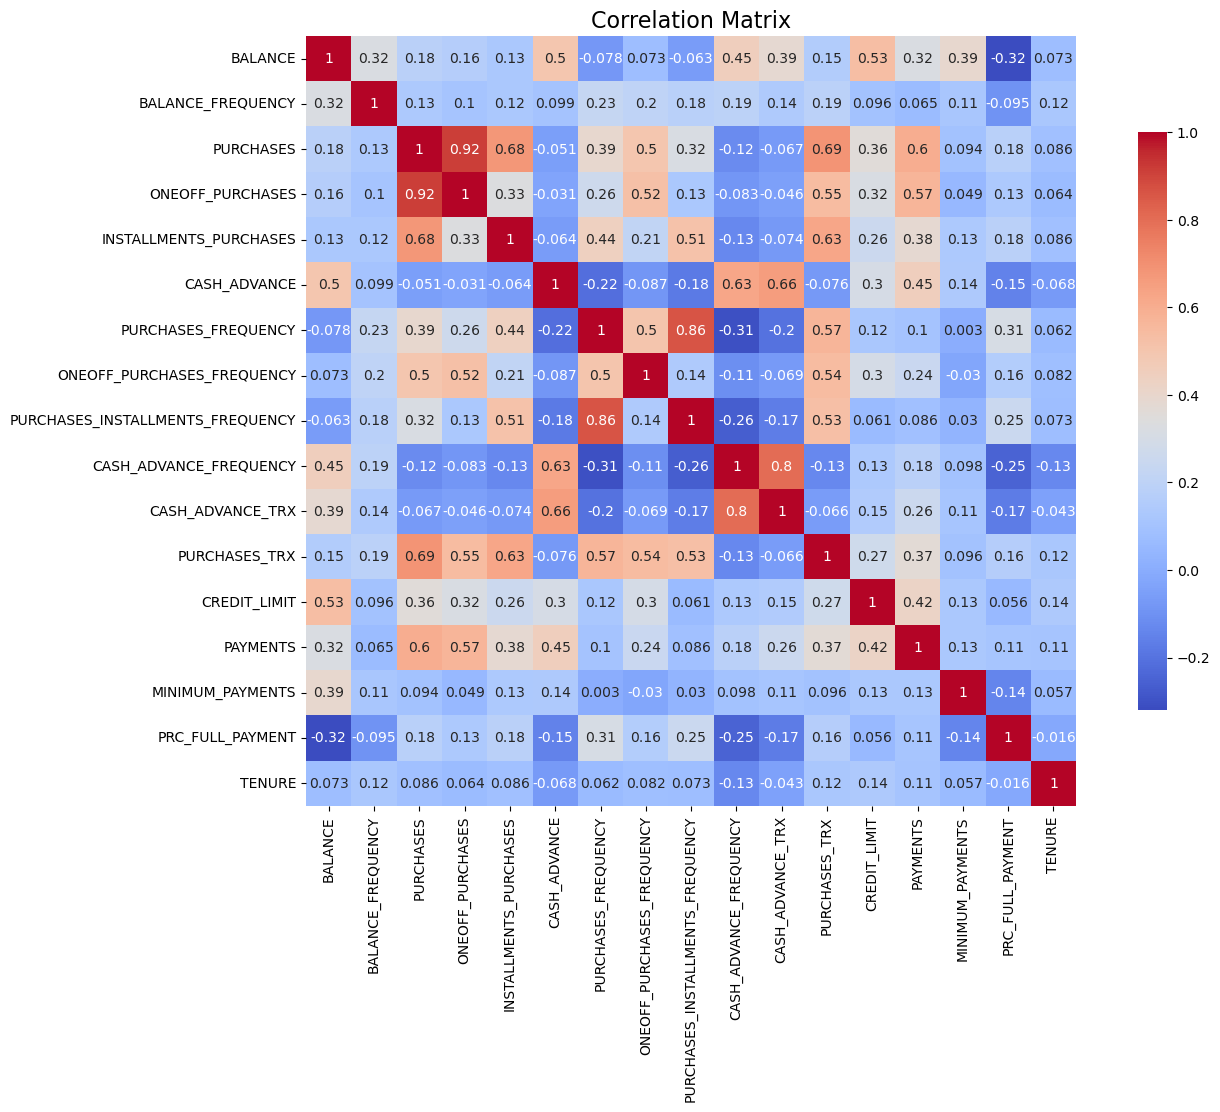

In [10]:
#Mapa de calor para analisarmos as correlações no nosso dataset
plt.figure(figsize=(16, 10))

sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix", fontsize=16)

Observações que chamam atenção ao observar esse mapa de calor:
- 42% de correlação entre a quantidade de pagamentos feitos pelo cliente e o limite de cartão;
- 60% de correlação entre compras feitas de uma só vez e o valor do pagamento;
- 45% de correlação entre dinheiro adiantado e quantidade de pagamentos;
- 44% de correlação entre a frequência de compras e compras parceladas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

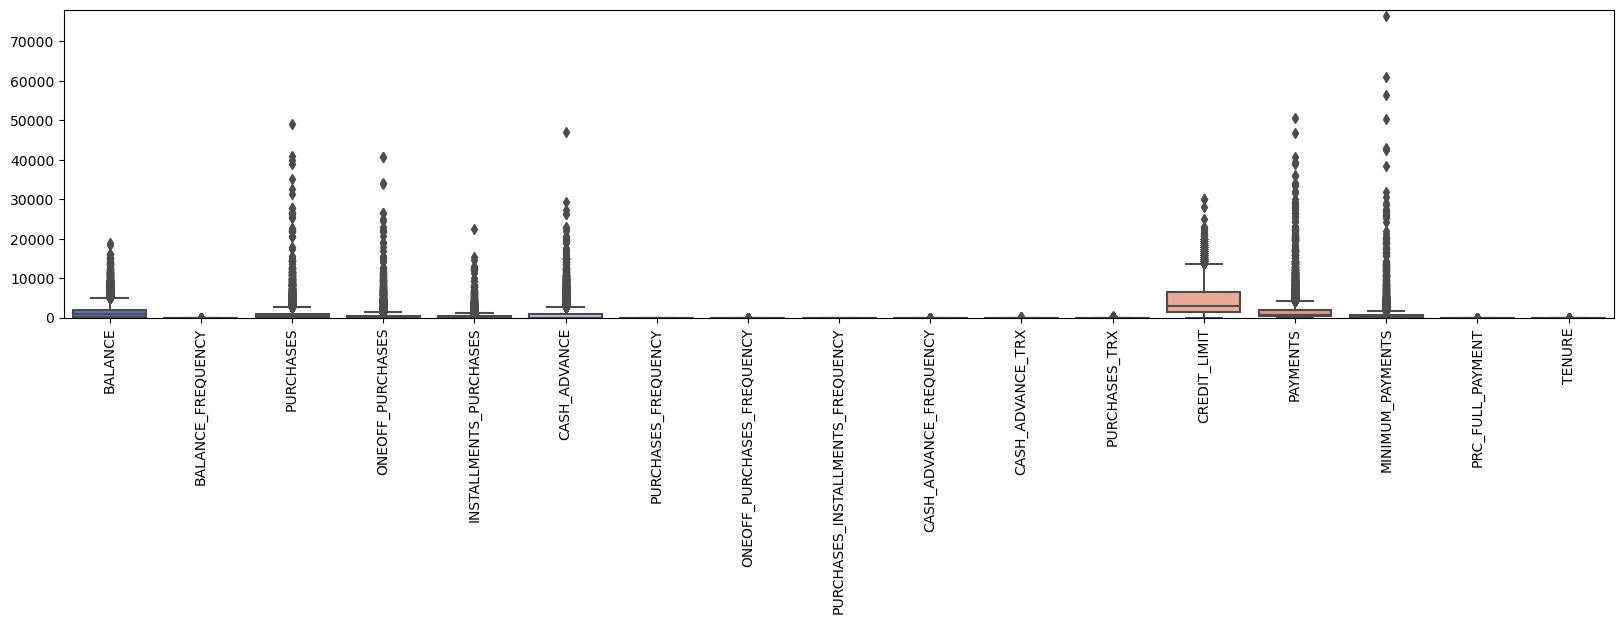

In [11]:
#Verificação de Outliers
plt.figure(figsize=(20, 4))

sns.boxplot(df, palette='coolwarm')
plt.ylim(0, 78000)

plt.xticks(rotation=90)

In [12]:
#Escalonamento dos nossos dados para um melhor resultado futuramente
scaler = StandardScaler()
df_scale = scaler.fit_transform(new_df)

Text(0, 0.5, 'Distâncias')

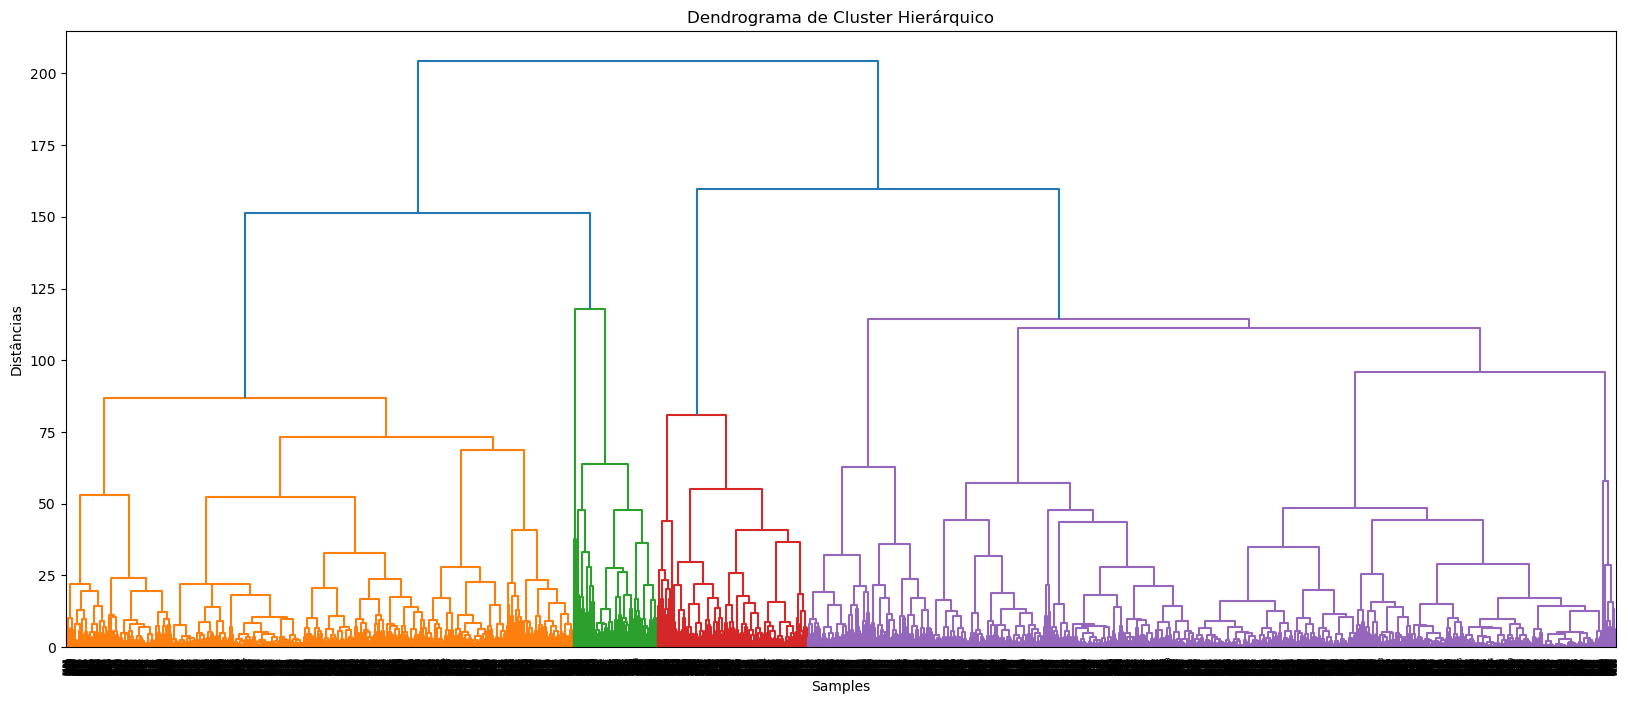

In [13]:
linkage_matrix = linkage(df_scale, method='ward')

plt.figure(figsize = (20, 8))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Cluster Hierárquico")
plt.xlabel("Samples")
plt.ylabel("Distâncias")

Só com essa informação já podemos definir o número de clusters como sendo igual a 4. Mas de qualquer maneira, usaremos também o 'Knee Point', que é uma maneira mais leve de se achar o número adequado de clusters para nosso dataset.

Obs.: Em datasets gigantes fica quase impossível usar esse dendograma, por isso existe também o Knee Point, ou também chamado, Elbow method.

In [14]:
inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    kmeans.fit(df_scale)
    inertia_values.append(kmeans.inertia_)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\clust

Text(6, 1500, 'Optimal Cluster')

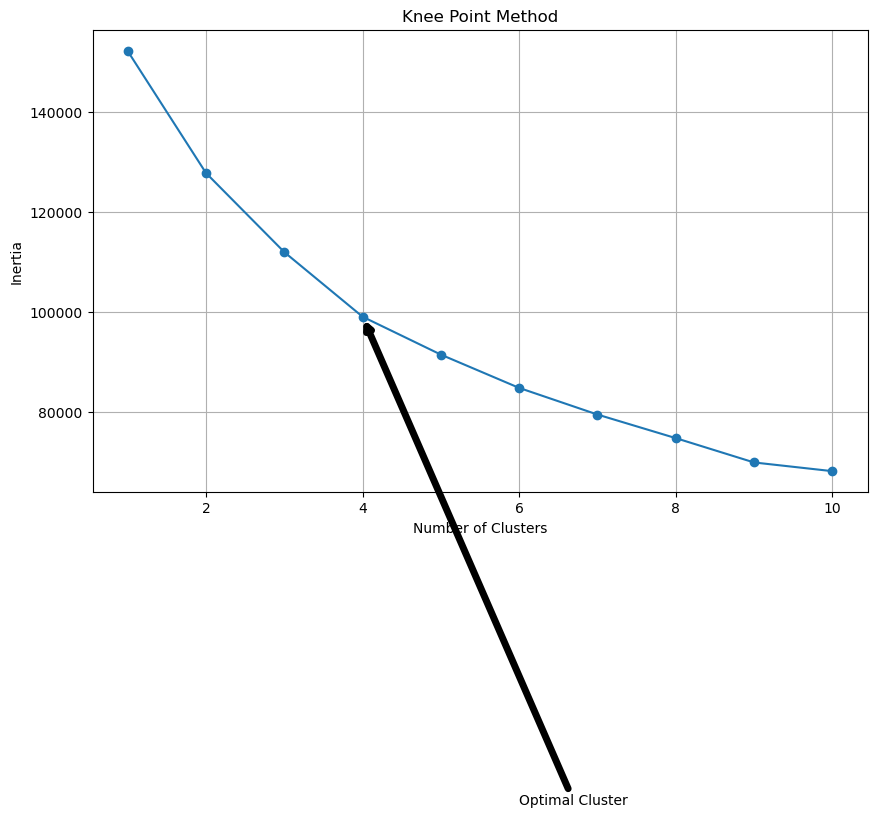

In [15]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Knee Point Method')
plt.grid(True)

plt.annotate('Optimal Cluster',
             xy=(4, inertia_values[3]),
             xytext=(6, 1500),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=5),
             )

A Inércia basicamente é um método para verificarmos qual o melhor número de clusters para nosso dataset, no exemplo acima, vemos que o melhor número é 4.

Ela é calculado pela distância dos pontos referentes aos seus centróides elevado ao quadrado, isso na métrica euclidiana.

In [16]:
#definindo agora nosso modelo com o melhor número de clusters
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++')
kmeans.fit(df_scale)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [17]:
df_scale = pd.DataFrame(df_scale, columns=new_df.columns)
df_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [18]:
#criando uma cópia do df_scale para colocarmos a coluna 'cluster'
df_final = new_df.copy()
df_final['cluster'] = kmeans.labels_
df_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


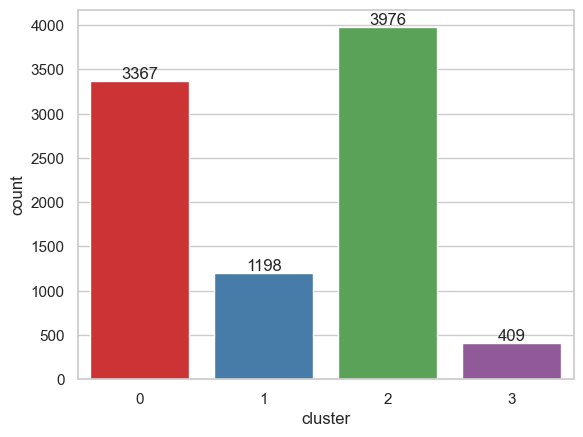

In [19]:
#quantidade de linhas com cada um de nossos clusters
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_final, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

In [20]:
df_final.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


Conclusão final:
- Cluster 3: Aqui estão os clientes mais 'ricos' vamos se dizer. Com alto valor em conta, altas compras e alto limite. Ou seja, não é de se suspeitar alguma compra grande sendo feita;
- Cluster 2: Aqui estão os clientes mais 'pobres', vamos assim dizer. A média deles é ter pouco dinheiro em conta, poucas compras e limite não tão alto;
- Cluster 1: Aqui estão clientes com a média de financiamento mais alta dentre todos os outros clusters, não necessariamente são pobres ou ricos, mas sim, que passaram, provavelmente, por alguma dificuldade financeira e precisaram arrumar um dinheiro;
- Cluster 0: Aqui estão os clientes mais 'seguros', não significa que são os mais 'pobres', mas sim que não fazem muitas compras, apenas o necessário. Ou seja, quando for feito muitas transações de uma vez em algum cliente parecido com estes casos, há uma desconfiança maior de fraude.

0 --> Seguro

1 --> Em dívida

2 --> Desfavorecidos

3 --> Bem-sucedidos

In [21]:
df_final_2 = df_final.copy()
df_final_2['cluster'] = df_final_2['cluster'].map({0: "Seguro", 1: "Em dívida", 2: "Desfavorecido", 3: "Bem-sucedido"})

Text(0, 0.5, 'Qnt. compras')

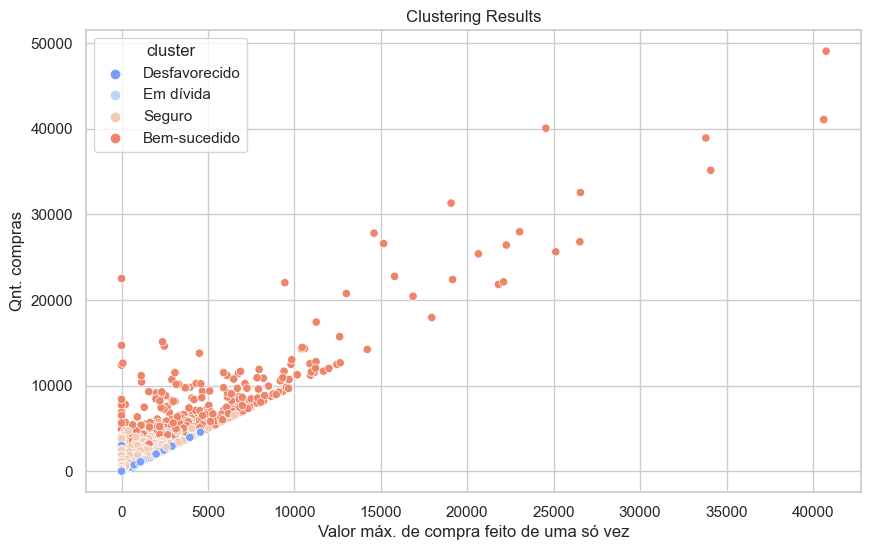

In [22]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_final_2['ONEOFF_PURCHASES'], y=df_final_2['PURCHASES'], hue = df_final_2['cluster'], palette='coolwarm')
plt.title("Clustering Results")
plt.xlabel("Valor máx. de compra feito de uma só vez")
plt.ylabel("Qnt. compras")

Text(0, 0.5, 'Valor em conta')

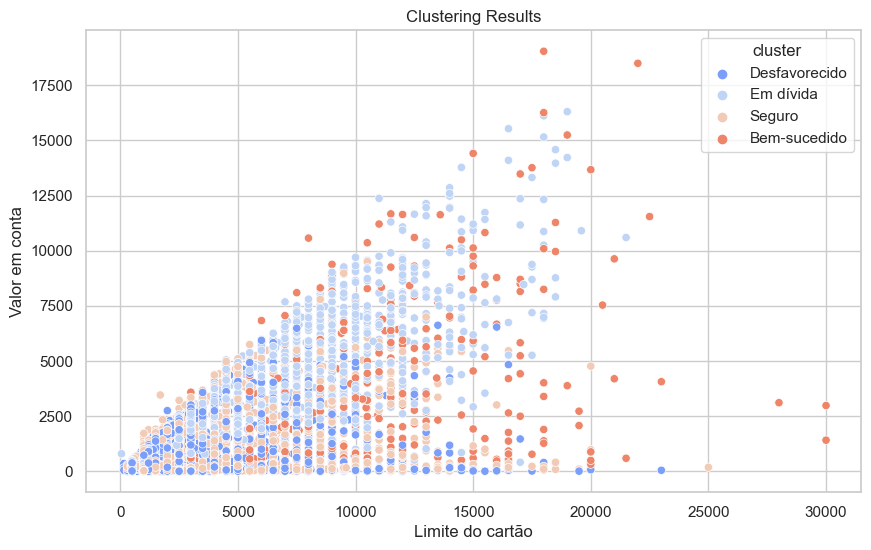

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_final_2['CREDIT_LIMIT'], y=df_final_2['BALANCE'], hue = df_final_2['cluster'], palette='coolwarm')
plt.title("Clustering Results")
plt.xlabel("Limite do cartão")
plt.ylabel("Valor em conta")

In [24]:
#adicionando o modelo PCA
pca = PCA()
pca.fit(df_scale)

PCA()

Para que o PCA (Principal Component Analysis) serve?
- Facilitar a visualização de dados;
- Redução de Dimensionalidade;
- Mostra as principais características dos principais componentes que tem impacto no target.

In [25]:
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517,
       0.94302415, 0.96076047, 0.97502539, 0.98719908, 0.99732898,
       0.99999931, 1.        ])

([<matplotlib.axis.XTick at 0x2600ef39db0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

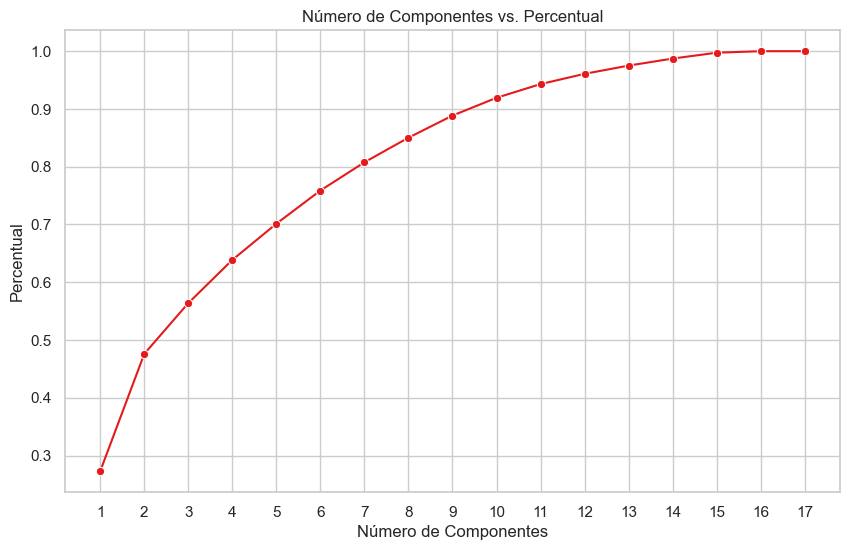

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1), y=np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual')
plt.title('Número de Componentes vs. Percentual')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))

Aqui já conseguimos definir o número de componentes do nosso PCA, apenas analisando que os 2 primeiros componentes representam 47,59% da variância explicada de nosso modelo.

In [28]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scale)

Agora repetiremos o processo para adicionar o PCA ao KMeans

In [29]:
inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    kmeans.fit(df_pca)
    inertia_values.append(kmeans.inertia_)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\clust

Text(6, 1500, 'Optimal Cluster')

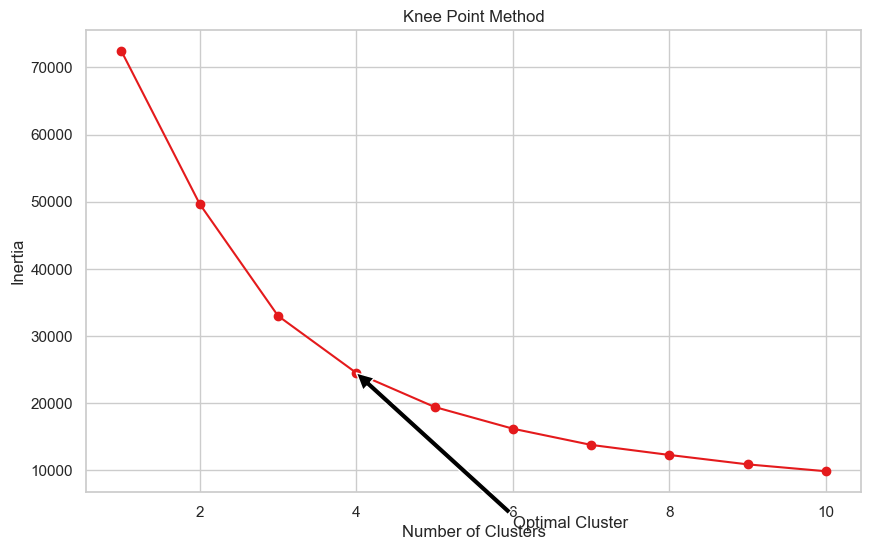

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Knee Point Method')
plt.grid(True)

plt.annotate('Optimal Cluster',
             xy=(4, inertia_values[3]),
             xytext=(6, 1500),
             arrowprops=dict(facecolor='black'),
             )

4 novamente será nosso número de clusters.

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++')
kmeans.fit(df_pca)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
df_pca = pd.DataFrame(df_pca, columns=['componente 1', 'componente 2'])
df_pca.head()

,componente 1,componente 2
0,-1.682219,-1.076461
1,-1.138290,2.506448
2,0.969679,-0.383452
3,-0.873626,0.043160
4,-1.599433,-0.688591


In [33]:
df_finalresult = pd.concat([new_df, df_pca], axis=1)
df_finalresult['cluster'] = kmeans.labels_
df_finalresult

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,componente 1,componente 2,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.682219,-1.076461,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.138290,2.506448,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.969679,-0.383452,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,-0.873626,0.043160,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.599433,-0.688591,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,-0.359629,-2.016152,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,-0.564368,-1.639132,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,-0.926203,-1.810795,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,-2.336550,-0.657998,1


In [34]:
df_finalresult.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,componente 1,componente 2
cluster,,,,,,,,,,,,,,,,,,,
0,824.180354,0.919997,1236.499406,621.738764,614.965725,147.442197,0.862440,0.301883,0.675116,0.030698,0.569732,21.317296,4250.051843,1328.949020,593.589483,0.282861,11.661693,0.911123,-1.167569
1,1014.449403,0.799843,223.057629,157.536400,65.850260,614.920972,0.190136,0.074882,0.109998,0.122449,2.264098,2.961215,3111.175755,856.181622,587.072147,0.065948,11.364379,-1.363106,-0.195337
2,4508.592174,0.963457,462.914437,300.368650,162.645201,4403.476123,0.266204,0.129934,0.166120,0.471215,13.781350,6.705788,7456.595294,3545.166835,2060.654606,0.034975,11.438907,-0.536339,3.421542
3,3401.840056,0.988427,6894.613917,4511.889901,2383.916859,773.154467,0.954443,0.726667,0.808946,0.084806,2.363817,82.902584,9541.650099,6723.271522,1831.233832,0.288014,11.960239,5.998192,0.682752


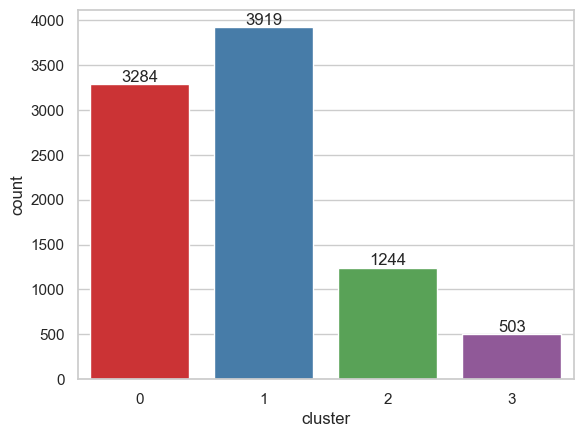

In [35]:
#quantidade de linhas com cada um de nossos clusters
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_finalresult, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

In [36]:
df_finalresult['cluster'] = df_finalresult['cluster'].map({0: "Seguro", 1: "Em dívida", 2: "Desfavorecido", 3: "Bem-sucedido"})

Text(0.5, 1.0, 'Clusters vs. PCA')

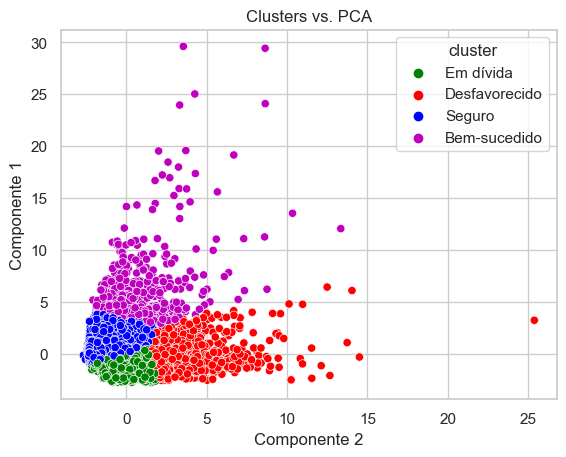

In [37]:
sns.scatterplot(data = df_finalresult, x='componente 2', y='componente 1', hue='cluster', palette=['g', 'r', 'b', 'm'])
plt.xlabel('Componente 2')
plt.ylabel('Componente 1')
plt.title("Clusters vs. PCA")

E aqui acabamos nossa análise, com a visualização de nossos dados 10x melhor.